<a href="https://colab.research.google.com/github/FahruddinZaimIbrahim/PCVK_Ganjil_2024/blob/main/Week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

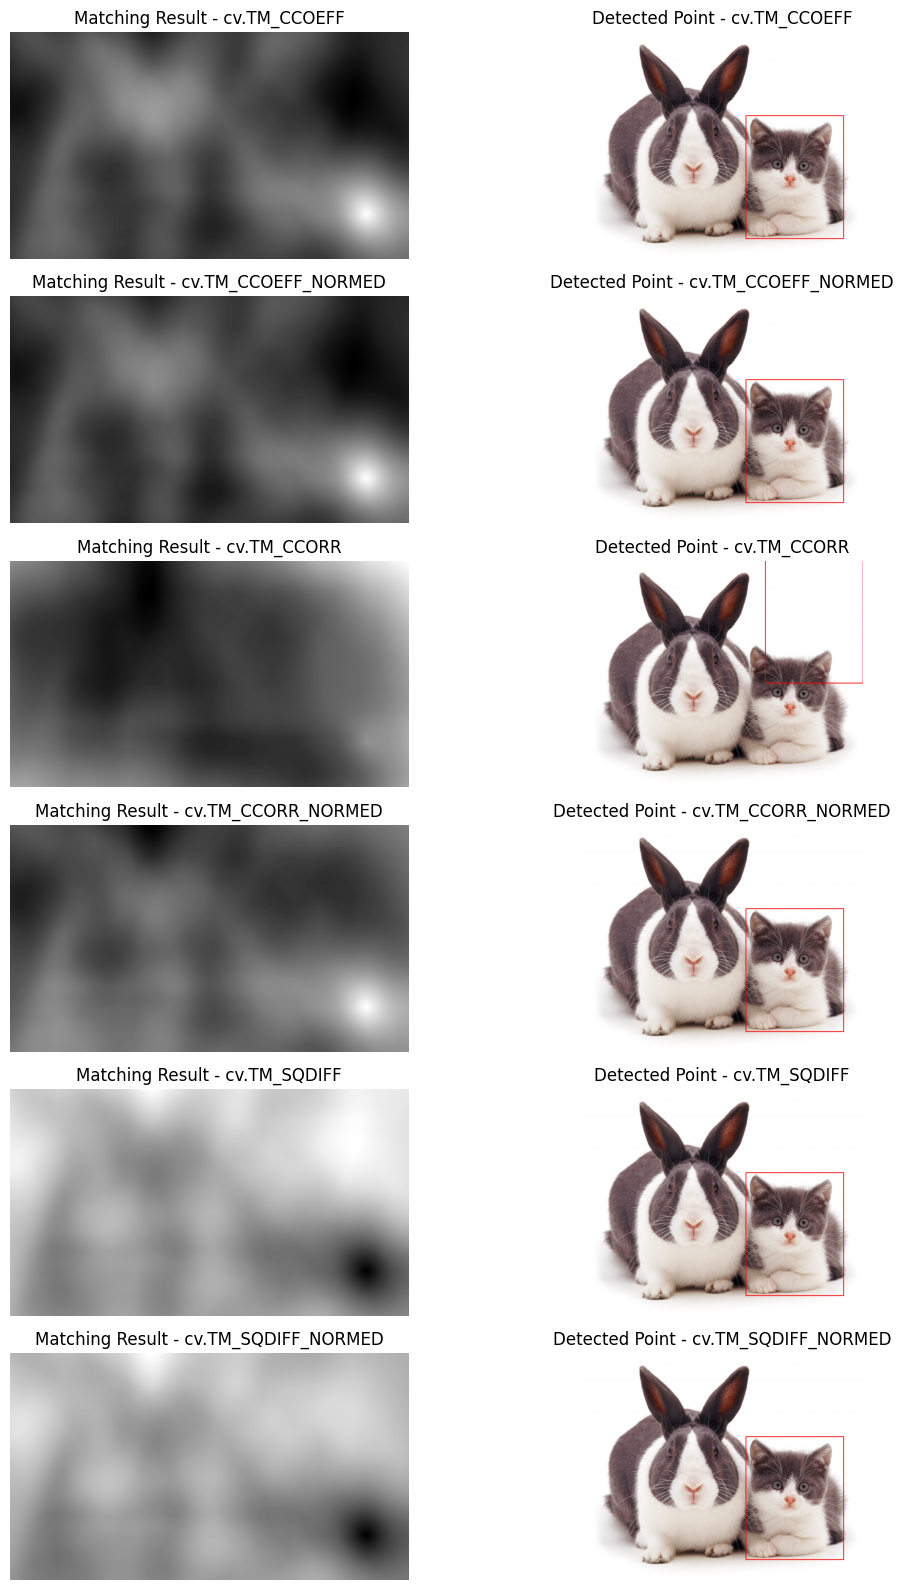

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def perform_template_matching():
    # Baca gambar utama dan template
    img = cv.imread("/content/drive/MyDrive/PCVK/Images/cats_and_bunnies.jpg", cv.IMREAD_COLOR)
    templ = cv.imread("/content/drive/MyDrive/PCVK/Images/cat2_templatejpg.jpg", cv.IMREAD_COLOR)

    # Konversi ke grayscale
    img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    templ_gray = cv.cvtColor(templ, cv.COLOR_BGR2GRAY)

    # Dapatkan dimensi template
    h, w = templ_gray.shape

    # Daftar metode template matching yang akan digunakan
    methods = [
        ('cv.TM_CCOEFF', cv.TM_CCOEFF),
        ('cv.TM_CCOEFF_NORMED', cv.TM_CCOEFF_NORMED),
        ('cv.TM_CCORR', cv.TM_CCORR),
        ('cv.TM_CCORR_NORMED', cv.TM_CCORR_NORMED),
        ('cv.TM_SQDIFF', cv.TM_SQDIFF),
        ('cv.TM_SQDIFF_NORMED', cv.TM_SQDIFF_NORMED)
    ]

    plt.figure(figsize=(12, 16))

    for idx, (method_name, method) in enumerate(methods):
        # Lakukan template matching
        result = cv.matchTemplate(img_gray, templ_gray, method)

        # Dapatkan lokasi matching terbaik
        if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
            min_val, max_val, min_loc, max_loc = cv.minMaxLoc(result)
            top_left = min_loc
        else:
            min_val, max_val, min_loc, max_loc = cv.minMaxLoc(result)
            top_left = max_loc

        bottom_right = (top_left[0] + w, top_left[1] + h)

        # Buat salinan gambar untuk menggambar kotak
        img_display = img.copy()
        cv.rectangle(img_display, top_left, bottom_right, (0, 0, 255), 2)

        # Plot hasil
        plt.subplot(6, 2, 2*idx + 1)
        plt.imshow(result, cmap='gray')
        plt.title(f'Matching Result - {method_name}')
        plt.axis('off')

        plt.subplot(6, 2, 2*idx + 2)
        plt.imshow(cv.cvtColor(img_display, cv.COLOR_BGR2RGB))
        plt.title(f'Detected Point - {method_name}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Jalankan fungsi
perform_template_matching()

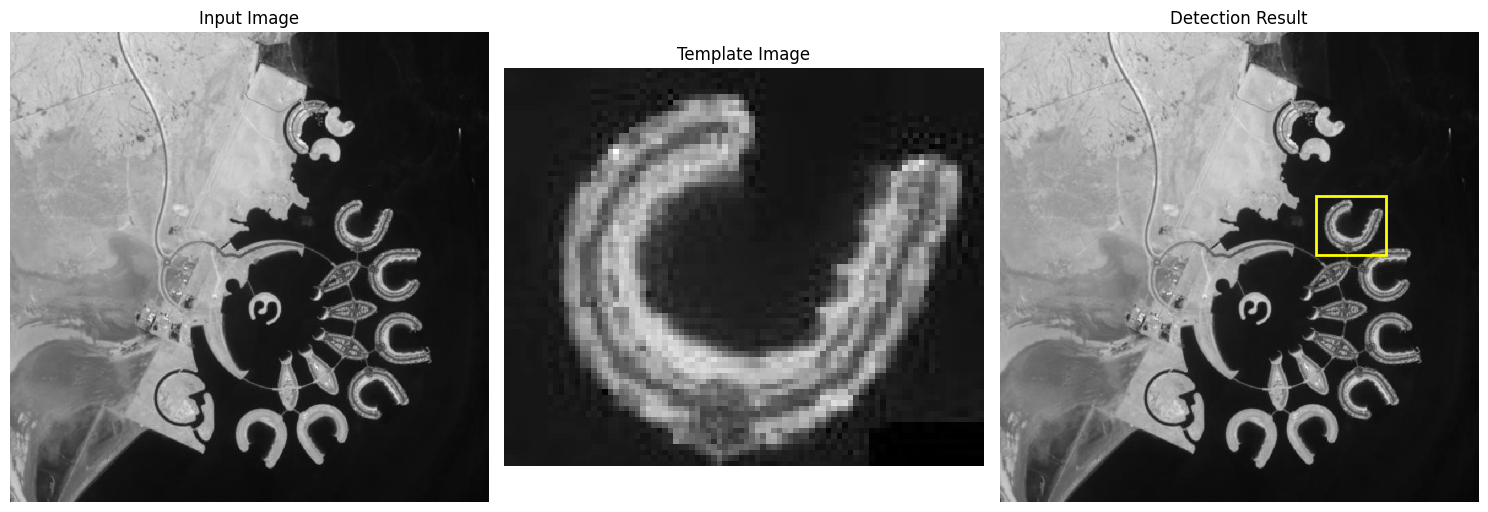

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def load_and_convert_to_grayscale(image_path):
    # Baca gambar dan konversi ke grayscale
    img = Image.open(image_path).convert('L')
    return np.array(img)

def normalize_image(image):
    # Normalisasi nilai pixel ke range 0-1
    return (image - np.min(image)) / (np.max(image) - np.min(image))

def template_matching(image, template, threshold=0.8):
    # Dapatkan dimensi
    img_height, img_width = image.shape
    tpl_height, tpl_width = template.shape

    # Normalisasi gambar
    image_norm = normalize_image(image)
    template_norm = normalize_image(template)

    # Matrix untuk menyimpan hasil correlation
    correlation = np.zeros((img_height - tpl_height + 1, img_width - tpl_width + 1))

    # Hitung correlation untuk setiap posisi
    for y in range(correlation.shape[0]):
        for x in range(correlation.shape[1]):
            # Ambil region yang sesuai dengan ukuran template
            region = image_norm[y:y+tpl_height, x:x+tpl_width]

            # Hitung normalized cross-correlation
            numerator = np.sum((region - np.mean(region)) * (template_norm - np.mean(template_norm)))
            denominator = np.sqrt(np.sum((region - np.mean(region))**2) * np.sum((template_norm - np.mean(template_norm))**2))

            if denominator != 0:
                correlation[y, x] = numerator / denominator

    # Temukan local maxima yang melebihi threshold
    coordinates = []
    for y in range(1, correlation.shape[0]-1):
        for x in range(1, correlation.shape[1]-1):
            if correlation[y, x] > threshold:
                # Cek apakah ini local maximum
                local_region = correlation[y-1:y+2, x-1:x+2]
                if correlation[y, x] == np.max(local_region):
                    coordinates.append((x, y))

    return correlation, coordinates

def plot_results(image, template, coordinates, template_size):
    plt.figure(figsize=(15, 5))

    # Plot input image
    plt.subplot(131)
    plt.imshow(image, cmap='gray')
    plt.title('Input Image')
    plt.axis('off')

    # Plot template
    plt.subplot(132)
    plt.imshow(template, cmap='gray')
    plt.title('Template Image')
    plt.axis('off')

    # Plot result dengan bounding boxes
    plt.subplot(133)
    plt.imshow(image, cmap='gray')
    plt.title('Detection Result')

    # Gambar bounding box untuk setiap deteksi
    for x, y in coordinates:
        rect = plt.Rectangle((x, y), template_size[1], template_size[0],
                           fill=False, color='yellow', linewidth=2)
        plt.gca().add_patch(rect)

    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Main execution
def main():
    # Load images
    image = load_and_convert_to_grayscale('/content/drive/MyDrive/PCVK/Images/bahrain.jpg')
    template = load_and_convert_to_grayscale('/content/drive/MyDrive/PCVK/Images/bahrain-template.jpg')

    # Perform template matching
    correlation, coordinates = template_matching(image, template, threshold=0.8)

    # Plot results
    plot_results(image, template, coordinates, template.shape)

if __name__ == "__main__":
    main()

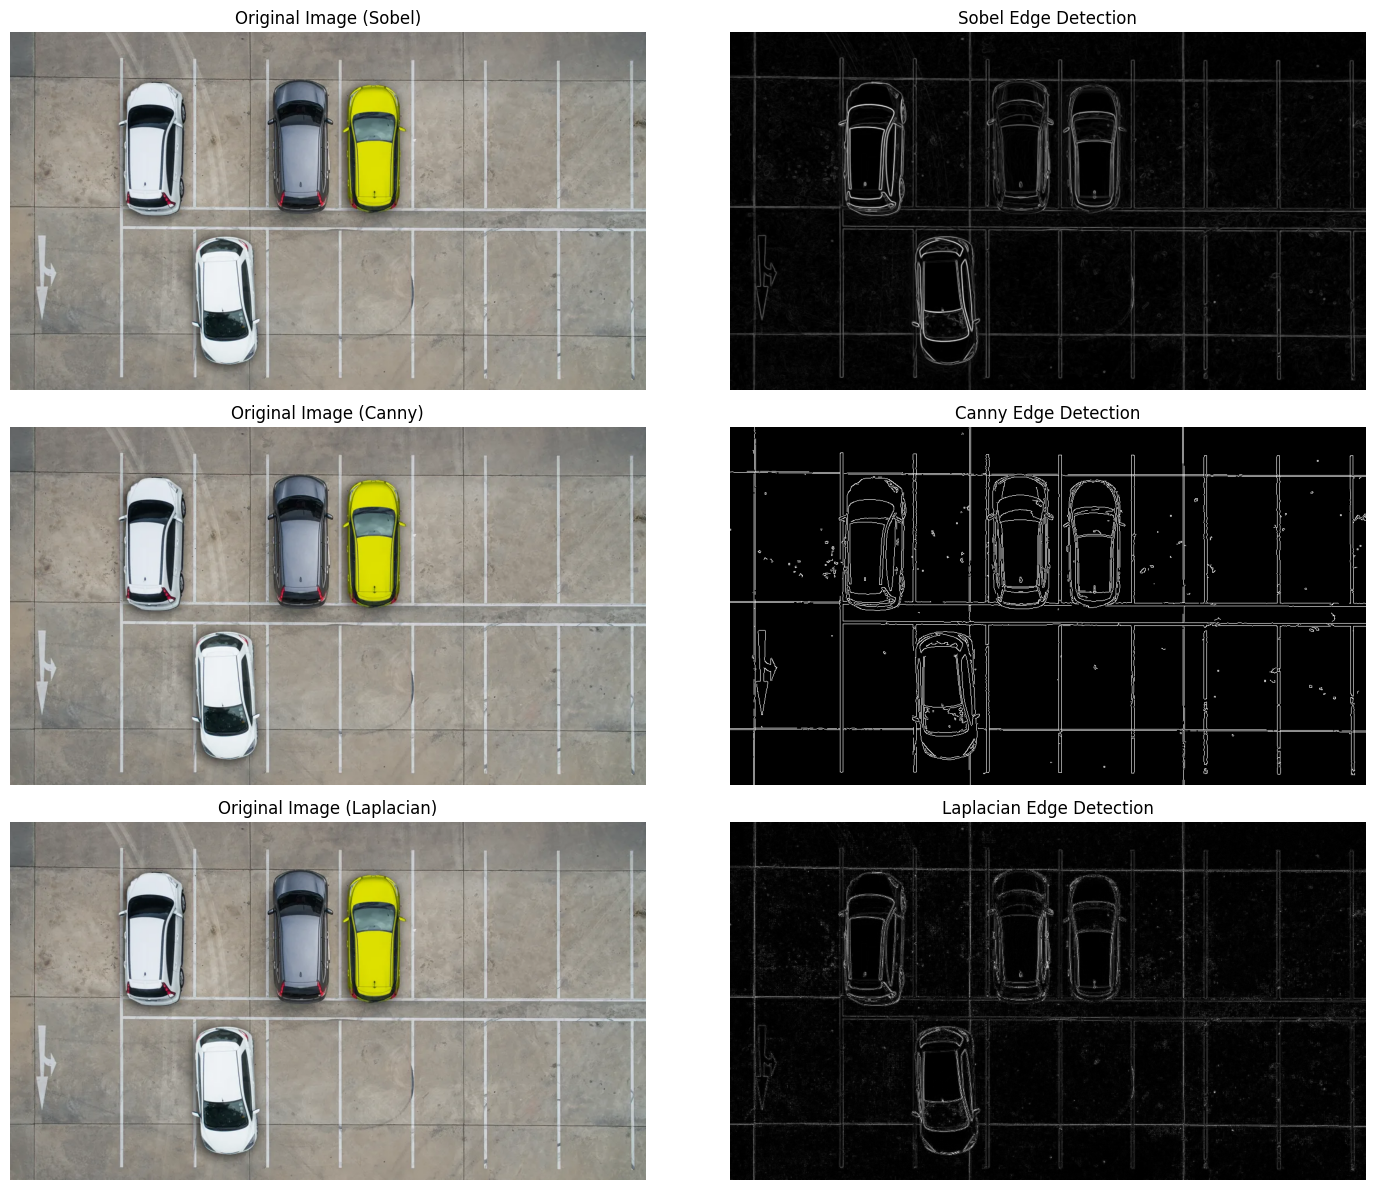

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def load_image(path):
    """Load image and convert to grayscale"""
    img = cv2.imread(path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img, gray

def apply_edge_detection(image):
    """Apply different edge detection methods"""
    # Sobel Edge Detection
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    sobel = np.sqrt(sobel_x**2 + sobel_y**2)
    sobel = np.uint8(sobel * 255 / np.max(sobel))

    # Canny Edge Detection
    canny = cv2.Canny(image, 100, 200)

    # Laplacian Edge Detection
    laplacian = cv2.Laplacian(image, cv2.CV_64F)
    laplacian = np.uint8(np.absolute(laplacian))

    return sobel, canny, laplacian

def plot_results(original, sobel, canny, laplacian):
    """Plot all results in a single figure"""
    plt.figure(figsize=(15, 12))

    # Sobel Edge Detection
    plt.subplot(321)
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.title('Original Image (Sobel)')
    plt.axis('off')

    plt.subplot(322)
    plt.imshow(sobel, cmap='gray')
    plt.title('Sobel Edge Detection')
    plt.axis('off')

    # Canny Edge Detection
    plt.subplot(323)
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.title('Original Image (Canny)')
    plt.axis('off')

    plt.subplot(324)
    plt.imshow(canny, cmap='gray')
    plt.title('Canny Edge Detection')
    plt.axis('off')

    # Laplacian Edge Detection
    plt.subplot(325)
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.title('Original Image (Laplacian)')
    plt.axis('off')

    plt.subplot(326)
    plt.imshow(laplacian, cmap='gray')
    plt.title('Laplacian Edge Detection')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

def main():
    # Load image
    img, gray = load_image('/content/drive/MyDrive/PCVK/Images/car-park.jpg')

    # Apply edge detection
    sobel, canny, laplacian = apply_edge_detection(gray)

    # Plot results
    plot_results(img, sobel, canny, laplacian)

if __name__ == "__main__":
    main()

<ipython-input-4-be2a01a788f0>:22: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


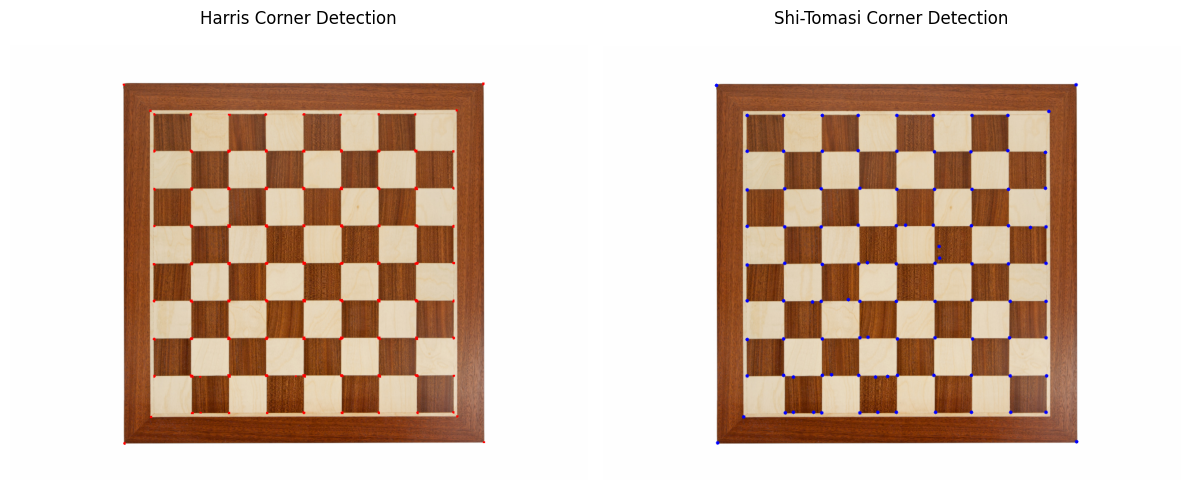

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_corners(image_path):
    # Read the image
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Harris Corner Detection
    harris_img = img.copy()
    gray_float = np.float32(gray)
    harris_corners = cv2.cornerHarris(gray_float, blockSize=2, ksize=3, k=0.04)
    harris_corners = cv2.dilate(harris_corners, None)

    # Threshold for harris corners
    harris_img[harris_corners > 0.01 * harris_corners.max()] = [0, 0, 255]

    # Shi-Tomasi Corner Detection
    shi_tomasi_img = img.copy()
    corners = cv2.goodFeaturesToTrack(gray, maxCorners=100, qualityLevel=0.01, minDistance=10)
    corners = np.int0(corners)

    # Draw Shi-Tomasi corners
    for corner in corners:
        x, y = corner.ravel()
        cv2.circle(shi_tomasi_img, (x, y), 3, [255, 0, 0], -1)

    # Save results
    cv2.imwrite('harris_corners.jpg', harris_img)
    cv2.imwrite('shi_tomasi_corners.jpg', shi_tomasi_img)

    return harris_img, shi_tomasi_img

# Function to display results
def display_results(harris_img, shi_tomasi_img):
    plt.figure(figsize=(12, 6))

    plt.subplot(121)
    plt.imshow(cv2.cvtColor(harris_img, cv2.COLOR_BGR2RGB))
    plt.title('Harris Corner Detection')
    plt.axis('off')

    plt.subplot(122)
    plt.imshow(cv2.cvtColor(shi_tomasi_img, cv2.COLOR_BGR2RGB))
    plt.title('Shi-Tomasi Corner Detection')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Main execution
image_path = '/content/drive/MyDrive/PCVK/Images/chess-board.jpg'
harris_result, shi_tomasi_result = detect_corners(image_path)
display_results(harris_result, shi_tomasi_result)

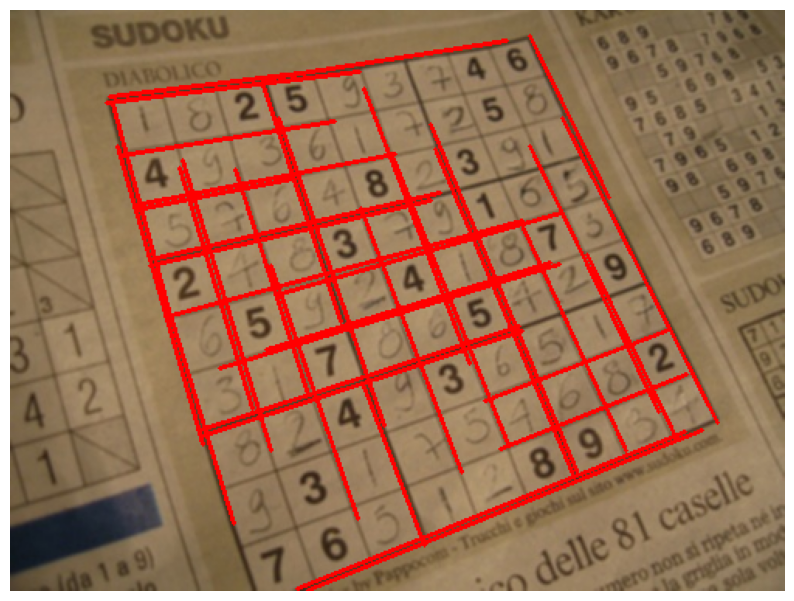

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Baca gambar Sudoku
image_path = '/content/drive/MyDrive/PCVK/Images/sudoku.jpg'  # Sesuaikan dengan lokasi gambar Anda
image = cv2.imread(image_path, cv2.IMREAD_COLOR)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Lakukan GaussianBlur untuk mengurangi noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Lakukan deteksi tepi dengan Canny
edges = cv2.Canny(blurred, 50, 150, apertureSize=3)

# Deteksi garis menggunakan Hough Transform
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, 100, minLineLength=100, maxLineGap=10)

# Buat salinan gambar untuk menggambar garis
output = image.copy()

# Gambar garis pada gambar
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(output, (x1, y1), (x2, y2), (0, 0, 255), 2)

# Tampilkan gambar hasil deteksi grid
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

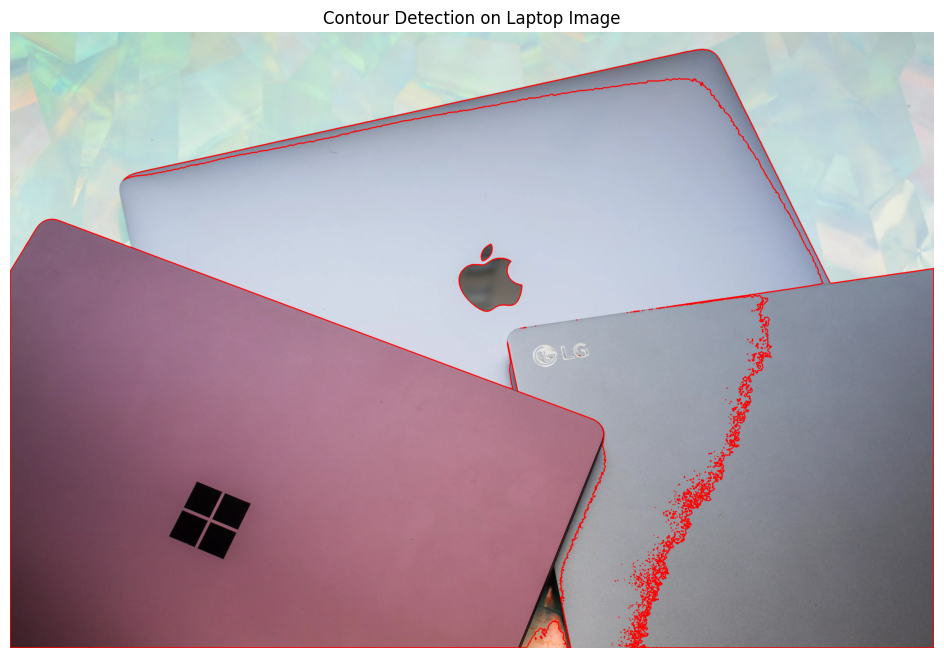

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_contours(image_path):
    # Membaca gambar
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Gaussian blur untuk mengurangi noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Thresholding untuk mendapatkan objek dengan warna yang jelas
    _, thresh = cv2.threshold(blurred, 150, 255, cv2.THRESH_BINARY_INV)

    # Mencari kontur
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Menggambar kontur pada gambar asli
    result = img.copy()
    cv2.drawContours(result, contours, -1, (0, 0, 255), 3)  # Warna merah dengan ketebalan 3

    return result

def display_result(result):
    # Konversi BGR ke RGB untuk visualisasi dengan matplotlib
    result_rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(12, 8))
    plt.imshow(result_rgb)
    plt.axis('off')
    plt.title('Contour Detection on Laptop Image')
    plt.show()

# Eksekusi utama
image_path = '/content/drive/MyDrive/PCVK/Images/laptop.jpg'  # Sesuaikan dengan jalur gambar Anda
result = detect_contours(image_path)
display_result(result)

141.0 (488, 800)


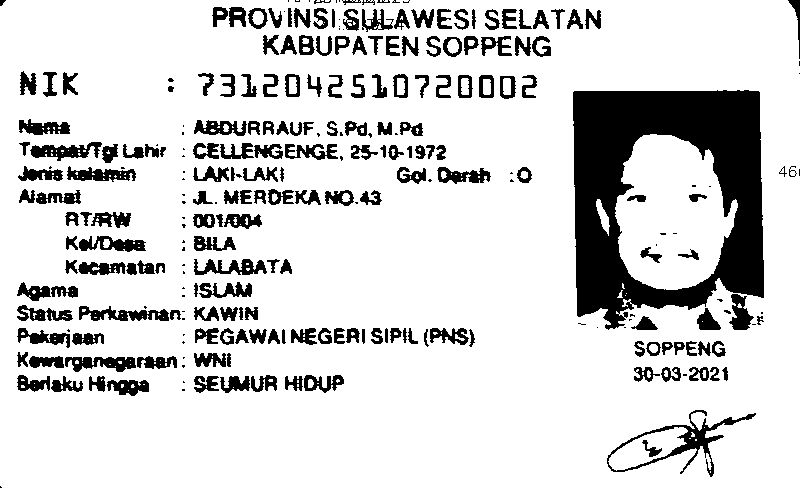

In [9]:
import cv2
import os
from google.colab.patches import cv2_imshow

# Lokasi hasil pelat
path_plate = "/content/drive/MyDrive/PCVK/Images/tes"

# Looping file di direktori
for name_file in sorted(os.listdir(path_plate)):
  src = cv2.imread(os.path.join(path_plate, name_file))
blurred = src.copy()
gray = blurred.copy()

# Filtering
for i in range(10):
  blurred = cv2.GaussianBlur(src, (5, 5), 0.5)

# Ubah ke grayscale
gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print(ret, bw.shape)
cv2_imshow(bw)

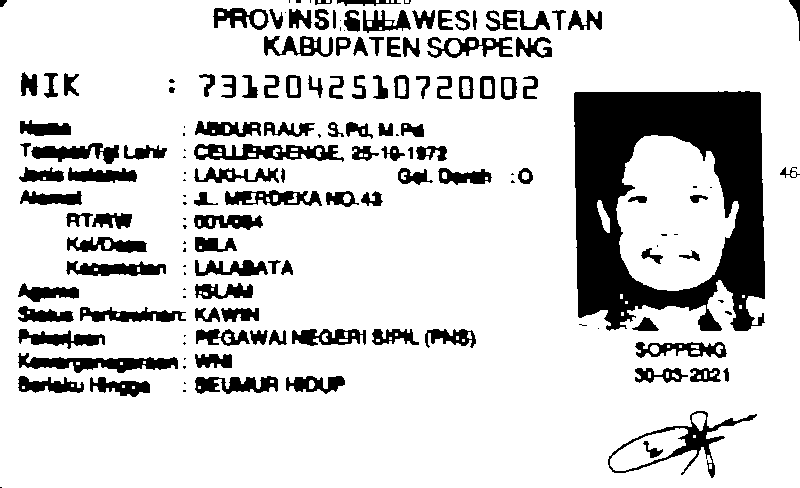

In [12]:
# Operasi Morfologi
# 1. Erosi untuk memisahkan karakter yang berhimpitan
kernel = np.ones((3,3), np.uint8)
eroded = cv2.erode(bw, kernel, iterations=1)

# 2. Dilasi untuk mengembalikan ukuran karakter
dilated = cv2.dilate(eroded, kernel, iterations=1)

# 3. Opening untuk membersihkan noise kecil
kernel_opening = np.ones((2,2), np.uint8)
opened = cv2.morphologyEx(dilated, cv2.MORPH_OPEN, kernel_opening)

# Tampilkan gambar hasil
cv2_imshow(opened)

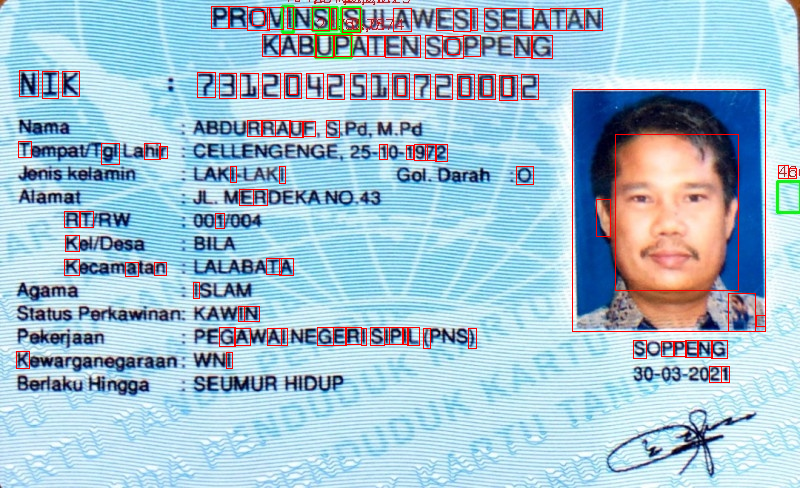

In [16]:
contours,  hierarchy= cv2.findContours(bw, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

# Contour drawing on the original image
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 40 and w >= 10 and float(ras) <= 1:
        cv2.rectangle(src, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 10 and w >= 5 and float(ras) <= 1:
        cv2.rectangle(src, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

# Display images with contours
cv2_imshow(src)